In [1]:
import numpy as np
import requests, gzip, os, hashlib
import matplotlib.pyplot as plt

In [2]:
path='/content/'
def fetch(url):
    fp = os.path.join(path, hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

In [3]:
X = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
y = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28))
y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [4]:
images = X.reshape(60000,28*28)/255
labels = np.eye(10)[y]
images_test = X_test.reshape(10000,28*28)/255
labels_test = np.eye(10)[y]

W1 = np.random.uniform(-0.5, 0.5, (20, 784))
W2 = np.random.uniform(-0.5, 0.5, (10, 20))
b1 = np.zeros((20, 1))
b2 = np.zeros((10, 1))

learn_rate = 0.05
nr_correct = 0
epochs = 3

In [5]:
# Currently working l = label
for epoch in range(epochs):
    for img, label in zip(images, labels):
        img.shape += (1,)
        label.shape += (1,)

        # Forward propagation input -> hidden
        Z1 = b1 + W1 @ img
        a1 = 1 / (1 + np.exp(-Z1))

        # Forward propagation hidden -> output
        Z2 = b2 + W2 @ a1
        a2 = 1 / (1 + np.exp(-Z2))

        # Cost / Error calculation
        e = 1 / len(a2) * np.sum((a2 - label) ** 2, axis=0)
        nr_correct += int(np.argmax(a2) == np.argmax(label))

        # Backpropagation output -> hidden (cost function derivative)
        delta_o = a2 - label
        W2 += -learn_rate * delta_o @ np.transpose(a1)
        b2 += -learn_rate * delta_o

        # Backpropagation hidden -> input (activation function derivative)
        delta_h = np.transpose(W2) @ delta_o * (a1 * (1 - a1))
        W1 += -learn_rate * delta_h @ np.transpose(img)
        b1 += -learn_rate * delta_h

    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0

Acc: 90.05%
Acc: 93.29%
Acc: 94.06%


Enter a number (0 - 9999): 
12


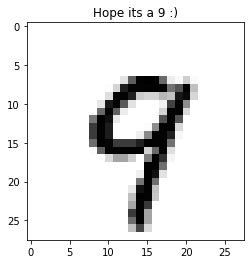

Enter a number (0 - 9999): 
40


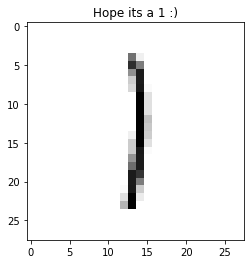

Enter a number (0 - 9999): 
678


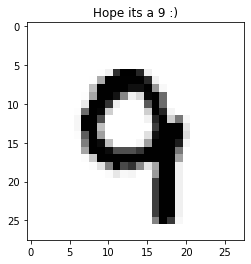

Enter a number (0 - 9999): 
6


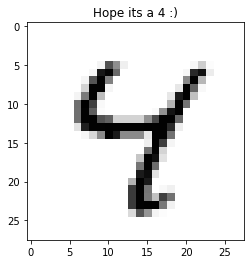

Enter a number (0 - 9999): 
90


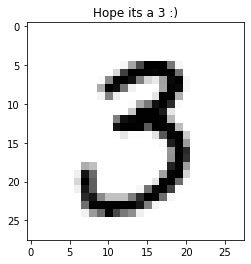

Enter a number (0 - 9999): 
stop


In [6]:
# Show results
while True:
    index = input("Enter a number (0 - 9999): \n")
    if index=="stop":
      break
    index = int(index)
    img = images_test[index]
    plt.imshow(img.reshape(28, 28), cmap="Greys")
 
    img.shape += (1,)
    # Forward propagation input -> hidden
    Z1 = b1 + W1 @ img.reshape(784, 1)
    a1 = 1 / (1 + np.exp(-Z1))
    # Forward propagation hidden -> output
    Z2 = b2 + W2 @ a1
    a2 = 1 / (1 + np.exp(-Z2))
 
    plt.title(f"Hope its a {a2.argmax()} :)")
    plt.show()